##Coursework 1
#**An Investigation in a Deep Learning Model for a Binary Classification of Movie Reviews**

##**Defining the Problem and Assembling a Dataset**
This investigation will be based on whether a deep learning model can be constructed and tested for the IMDB dataset (text-based film reviews) to classify whether or not a film review is either positive or negative. The fact that there are two classes for the model to differentiate, this problem will be addressed as a binary classification.

With the provided input samples from the movie database dataset, we can presuppose that there is sufficient data to provide a valid and accurate output from the model. We can also hypothesize that the data provided is adequately informative in order to validate our first hypothesis and to learn the relationship between the given inputs and outputs.

###**IMDB Dataset**
The IMDB dataset is a set of 50,000 online movie reviews from the internet movie database. The reviews are split into 25,000 training reviews and 25,000 reviews for testing. This consists of 50% positive reviews and 50% negative reviews. The reason why we separate training sets from the testing set is that it is impractical to test the model on data that has trained it. The models performance will be based on new data which it hasn't seen before.
The num_words = 10000 discards any rare words in the reviews which makes the data manageable and more predictable, with train_labels and test_labels are lists of 1's and 0's (1 being a positive review and 0 being a negative review).

##**Measure of Success**
I will be measuring the success of the model via the outputs (validation accuracy) as it is being tested. As this is a balanced classification problem with classes being equally likely, accuracy is a common success metric. This will allow me to observe them and tune the model to create a better one that fits better according to the outputs produced. The outputs produced will be floating-point values (0.0 - 1.0) which will be converted into percentage values. An example being 0.1 == 10%.

##**Evaluation Protocol**
To measure progress, I will be maintaining a hold-out validation set, an evaluation protocol that is great when handling large amounts of data. The hold-out validation sets apart a fraction of the data as a test set. The model is trained on the remaining data and then evaluates on the test set. As you should never tune your model based on the test set, the validation set is reserved to provide us data in which we can use to help make decisions when modifying the model.

##**Preparing Data**
As explained above in the IMDB dataset section, the data is split in half for the training set and the test set, both containing 25,000 reviews (with positive and negative reviews distributed evenly). The data set was limited to 10,000 of the most frequently used words which removed any rare words.

The training set and the test set were then converted into a vector using a one-hot encoding procedure. This made the dataset a valid format as tensors, allowing a valid input into the model. The values taken by the tensors are small (0's and 1's) making them suitable for the model. As the data is not heterogeneous, the data does not need to be normalised.

##**Creating a Model Better than Baseline**
We must first have a model that achieves statistical power. The baseline for IMDB is >0.5 as there are only two options.

The first model is as follows: trained through 20 epochs, 2 fully connected layers (the first layer is 8 hidden units and 'relu' activation and the final being 'sigmoid') with basic compilation models. The reason why my last layer activation is sigmoid is that the function maps any input to an output ranging from 0 to 1. I started with binary_crossentropy as it is what is advised to use in a binary classification problem. The optimizer was left as 'rmsprop'. However, this may be altered in future iterations of the model.

In [3]:
#Coursework
#importing
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
#vectorize data
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# load the data
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# build model
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

#defining graphs.
def lossGraph(loss, val_loss):
  

  epochs = range(1, len(loss) + 1)
  
  blue_dots = 'bo'
  solid_blue_line = 'b'

  plt.plot(epochs, loss, blue_dots, label = 'Training loss')
  plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def accGraph(acc,val_acc):
  plt.clf()
  
  epochs = range(1, len(acc) + 1)

  
  
  blue_dots = 'bo'
  solid_blue_line = 'b'
    
  plt.plot(epochs, acc, blue_dots, label = 'Training acc')
  plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
  plt.title('Training and validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5722 - accuracy: 0.7543 - val_loss: 0.4829 - val_accuracy: 0.8123
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4078 - accuracy: 0.8866 - val_loss: 0.3885 - val_accuracy: 0.8755
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3209 - accuracy: 0.9125 - val_loss: 0.3375 - val_accuracy: 0.8827
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2631 - accuracy: 0.9273 - val_loss: 0.3075 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2229 - accuracy: 0.9381 - val_loss: 0.2967 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1952 - accuracy: 0.9442 - val_loss: 0.2821 - val_accuracy: 0.8904
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1724 - accuracy: 0.9517 - val_loss: 0.2784 - val_accuracy: 0.8897
Epoch 8/20
30

In [4]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

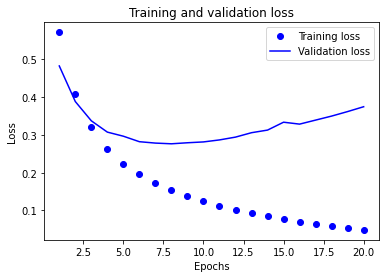

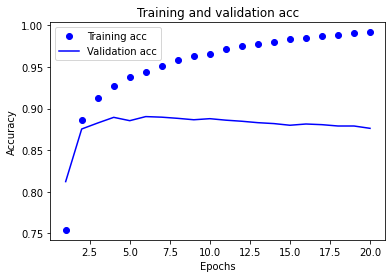

In [5]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Evaluating the Model**
model  | layers |hidden units |learn rate |minLoss |maxAcc
-------|--------|-------------|-----------|--------|--------
1      | 1      |8            |basic      | 0.2761 |0.8904


As you can see above, the model does have statistical power over the baseline. The highest accuracy is above 0.5. 
After 20 epochs, the minimum validation loss was 0.2761 and the maximum accuracy was 0.8904. This maximum validation accuracy was achieved on epoch 6. Although the model achieved statistical power, the validation accuracy deteriorated post epoch 6. It is important to state that the decrease in accuracy was low.

##**Scaling Up: Developing a Model that Overfits**
Although the base model was performing better statistically, there was still tuning to be done to increase the accuracy of the results. I must tune the model for it to overfit. This can be done in several ways:
1. Add Layers
1. Create larger layers by increasing units
1. I can train for more epochs ( this however will not be tested.)

Once I have achieved a model that does so, I will begin to tune the model so that it neither underfits nor overfits.

##**Model 2**
Model 2 has updated hyperparameters to achieve an overfitting
The parameters altered were the number of units and the number of layers in the model:
* changing unit to 32
* added a dense layer with 16 units


In [8]:
#model 2
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.4864 - accuracy: 0.7821 - val_loss: 0.4202 - val_accuracy: 0.8199
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2845 - accuracy: 0.9038 - val_loss: 0.2898 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2058 - accuracy: 0.9305 - val_loss: 0.3479 - val_accuracy: 0.8577
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1567 - accuracy: 0.9481 - val_loss: 0.4035 - val_accuracy: 0.8412
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1275 - accuracy: 0.9605 - val_loss: 0.3169 - val_accuracy: 0.8787
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1054 - accuracy: 0.9664 - val_loss: 0.3136 - val_accuracy: 0.8806
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0776 - accuracy: 0.9786 - val_loss: 0.3305 - val_accuracy: 0.8810
Epoch 8/20
30

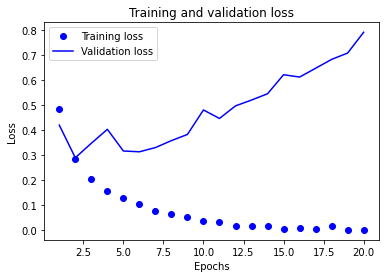

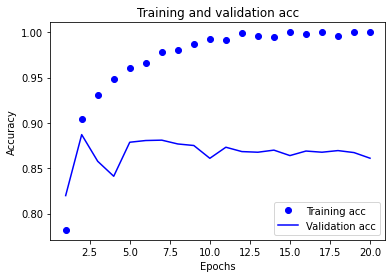

In [9]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)




##**Model 2 Evaluation**
model  | layers |hidden units |learn rate |minLoss |maxAcc
-------|--------|-------------|-----------|--------|--------
1      | 1      |8            |basic      | 0.2761 |0.8904
2      |2       |32,16        |basic      |0.2898  |0.8871

As seen in the results above, the max accuracy and minimum validation loss is reached after epoch 2, which means that the model was performing much better in the training data rather than the validation set. The validation accuracy graph also shows fluctuations, which is a sign of overfitting. Validation loss increasing is also a sign of overfitting. I believe that overfitting was achieved by altering the layers and units (hyperparameters) and the model is ready for regularising.

##**Regularising the Model and Tuning Hyperparameters**
The hyperparameters are ready to be tuned to try and create the best possible model. All models will be trained for 20 epochs and 512 batch sizes.

##**Model 3**
Tuned first layer to 16 units rather than 32


In [11]:
#model 3
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5113 - accuracy: 0.7827 - val_loss: 0.3833 - val_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3007 - accuracy: 0.9009 - val_loss: 0.3085 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2195 - accuracy: 0.9308 - val_loss: 0.2831 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1728 - accuracy: 0.9438 - val_loss: 0.2830 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1408 - accuracy: 0.9557 - val_loss: 0.2883 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1129 - accuracy: 0.9661 - val_loss: 0.3041 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0973 - accuracy: 0.9701 - val_loss: 0.3169 - val_accuracy: 0.8808
Epoch 8/20
30

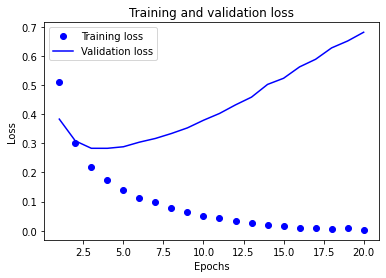

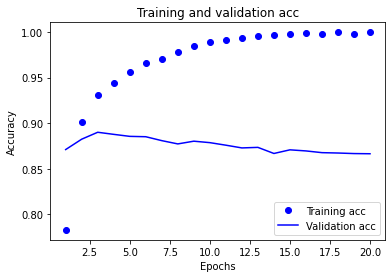

In [12]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Model 3 Evaluation**
model  | layers |hidden units |learn rate |minLoss |maxAcc
-------|--------|-------------|-----------|--------|--------
1      | 1      |8            |basic      |0.2761  |0.8904
2      |2       |32,16        |basic      |0.2898  |0.8871
3      |2       |16,16        |basic      |0.2830  |0.8900

Validation loss after 4 epochs was at its lowest while the validation accuracy peaked after 3 epochs. After decreasing the units, it is evident that there was no drastic change in the results. The validation loss, however, has been decreased slightly compared to model 2. There is still a steady increase overall.

One thing to note is that once adding the extra fully-connected layer, there has been a drastic increase in validation loss ( compared to the original model.) this will be changed in future models in an attempt to lower the loss.

##**Model 4**
Tuning on model 4:
* removed extra layer
* decreased units to 8

In [13]:
#model 4
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5170 - accuracy: 0.7955 - val_loss: 0.4211 - val_accuracy: 0.8557
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3500 - accuracy: 0.8931 - val_loss: 0.3451 - val_accuracy: 0.8789
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2779 - accuracy: 0.9153 - val_loss: 0.3096 - val_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2327 - accuracy: 0.9278 - val_loss: 0.2892 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2007 - accuracy: 0.9387 - val_loss: 0.2781 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1758 - accuracy: 0.9486 - val_loss: 0.2795 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1557 - accuracy: 0.9553 - val_loss: 0.2731 - val_accuracy: 0.8926
Epoch 8/20
30

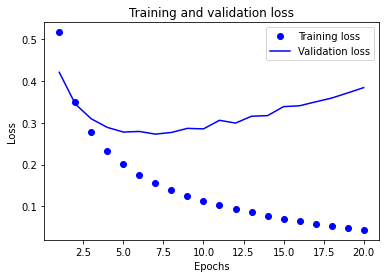

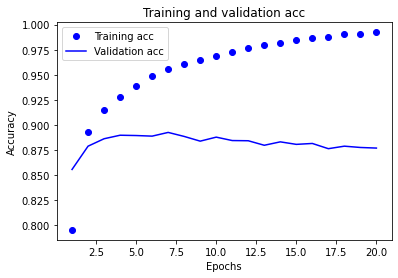

In [14]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Model 4 Evaluation**

model  | layers |hidden units |learn rate |minLoss |maxAcc
-------|--------|-------------|-----------|--------|--------
1      | 1      |8            |basic      |0.2761  |0.8904
2      |2       |32,16        |basic      |0.2898  |0.8871
3      |2       |16,16        |basic      |0.2830  |0.8900
4      |1       |8            |basic      |0.2731  |0.8926

The maximum validation accuracy was 0.8926 after 7 epochs. The minimum validation loss was 0.2731 after 7 epochs too.

The results above show us that removing a layer and decreasing the units in another provide us with a more predictable model regarding the validation accuracy and the validation loss has been reduced and has a longer rate of decline to epoch 7, rather than having a short decline ( epoch 3 in model 3 and epoch 2 in model 2). This is a sign that our model is less overfitting than the other models. The prediction that lowering the units will cause a decrease in validation loss will be noted for model 5.

##**Model 5**
Model 5 will consist of reducing the unit of the dense layer more to see if the prediction that lowering the units will provide better results as done with model 4.

The unit will be decreased from 8 to 4.

In [15]:
#model 5
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5792 - accuracy: 0.7459 - val_loss: 0.5022 - val_accuracy: 0.8163
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4366 - accuracy: 0.8758 - val_loss: 0.4157 - val_accuracy: 0.8715
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3564 - accuracy: 0.9033 - val_loss: 0.3634 - val_accuracy: 0.8819
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3025 - accuracy: 0.9167 - val_loss: 0.3322 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2634 - accuracy: 0.9263 - val_loss: 0.3093 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2338 - accuracy: 0.9343 - val_loss: 0.2946 - val_accuracy: 0.8916
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2102 - accuracy: 0.9397 - val_loss: 0.2874 - val_accuracy: 0.8899
Epoch 8/20
30

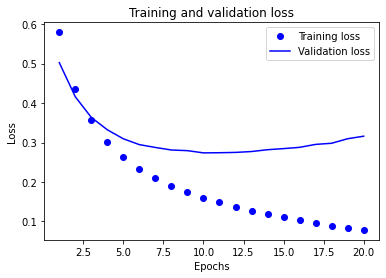

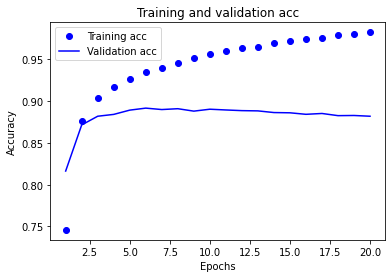

In [16]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Model 5 Evaluation**
model  | layers |hidden units |learn rate |minLoss |maxAcc
-------|--------|-------------|-----------|--------|--------
1      | 1      |8            |basic      |0.2761  |0.8904
2      |2       |32,16        |basic      |0.2898  |0.8871
3      |2       |16,16        |basic      |0.2830  |0.8900
4      |1       |8            |basic      |0.2731  |0.8926
5      |1       |4            |basic      |0.2737  |0.8916

The max validation accuracy peaked at epoch 6 and the minimum validation loss was at its lowest after epoch 11. 

The validation loss has been lowered on average and is slowly fitting with the training loss, however, there is still overfitting in later epochs as there is an increase in loss after epoch 10. Another improvement from the previous models where we saw the increase in loss much earlier:

1. model 1 - 8 epochs before anincrease
1. mode 2 - 2 epochs before an increase
1. model 3 - 4 epochs before an increase
1. model 4 -7 epochs before an increase

This model overfits less than previous models.


##**Model 6**
This model will include the lr and momentum in the optimiser. The inclusion in the model will first be tested.


In [19]:
#model 6
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.0),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5744 - accuracy: 0.7773 - val_loss: 0.5007 - val_accuracy: 0.8355
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4370 - accuracy: 0.8753 - val_loss: 0.4181 - val_accuracy: 0.8627
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3614 - accuracy: 0.8943 - val_loss: 0.3672 - val_accuracy: 0.8734
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3088 - accuracy: 0.9085 - val_loss: 0.3360 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2696 - accuracy: 0.9195 - val_loss: 0.3116 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2400 - accuracy: 0.9273 - val_loss: 0.3005 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2161 - accuracy: 0.9363 - val_loss: 0.2863 - val_accuracy: 0.8907
Epoch 8/20
30

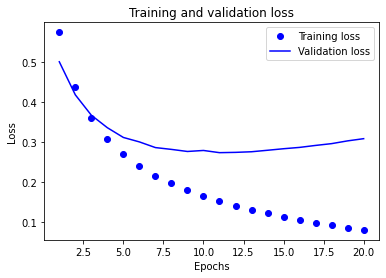

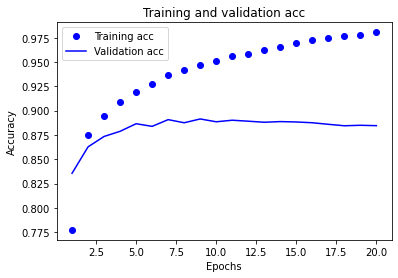

In [20]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Model 6 Evaluation**
model  | layers |hidden units |learn rate |minLoss |maxAcc
-------|--------|-------------|-----------|--------|--------
1      | 1      |8            |basic      |0.2761  |0.8904
2      |2       |32,16        |basic      |0.2898  |0.8871
3      |2       |16,16        |basic      |0.2830  |0.8900
4      |1       |8            |basic      |0.2731  |0.8926
5      |1       |4            |basic      |0.2737  |0.8916
6      |1       |4            |0.001      |0.2736  |0.8914

The model is very similar to model 5. The model did show better improvement on average compared to model 5. The output produced a maximum validation accuracy of 0.8914 on epoch 9 and a minimum loss of 0.2736 on epoch 11.

The model currently shows no reason to introduce lr of 0.001 so it will be modified.

##**Model 7**

model 7 will introduce a larger lr.


In [21]:
#model 7
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0020, momentum=0.0),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.4906 - accuracy: 0.8042 - val_loss: 0.3802 - val_accuracy: 0.8764
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3103 - accuracy: 0.9044 - val_loss: 0.3147 - val_accuracy: 0.8881
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2404 - accuracy: 0.9259 - val_loss: 0.2908 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1965 - accuracy: 0.9397 - val_loss: 0.2758 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1655 - accuracy: 0.9507 - val_loss: 0.2740 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1419 - accuracy: 0.9594 - val_loss: 0.2926 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1244 - accuracy: 0.9648 - val_loss: 0.2912 - val_accuracy: 0.8825
Epoch 8/20
30

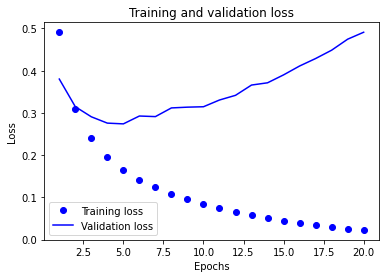

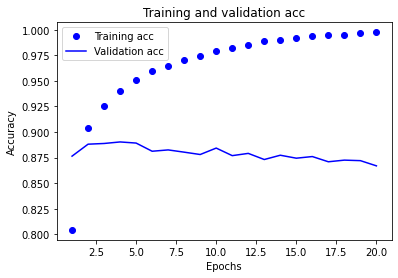

In [22]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**model 7 Evaluation**

model  | layers |hidden units |learn rate |minLoss |maxAcc
-------|--------|-------------|-----------|--------|--------
1      | 1      |8            |basic      |0.2761  |0.8904
2      |2       |32,16        |basic      |0.2898  |0.8871
3      |2       |16,16        |basic      |0.2830  |0.8900
4      |1       |8            |basic      |0.2731  |0.8926
5      |1       |4            |basic      |0.2737  |0.8916
6      |1       |4            |0.001      |0.2736  |0.8914
7      |1       |4            |0.0020     |0.2740  |0.8903

The maxAcc of 0.8903 was reached after epoch 4 and the minLoss of 0.2740 was achieved after epoch 5.
As shown in the loss graph, the model has been impacted negatively with the loss drastically increasing after epoch 5. This shows that the model overfits more compared to the other recent models prior.

##**Model 8**
lr will be decreased to see if less overfitting occurs.

In [23]:
#model 8
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005, momentum=0.0),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6444 - accuracy: 0.6022 - val_loss: 0.6090 - val_accuracy: 0.6368
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5671 - accuracy: 0.7590 - val_loss: 0.5523 - val_accuracy: 0.8089
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5099 - accuracy: 0.8391 - val_loss: 0.5053 - val_accuracy: 0.8481
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4595 - accuracy: 0.8741 - val_loss: 0.4670 - val_accuracy: 0.8373
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4155 - accuracy: 0.8931 - val_loss: 0.4285 - val_accuracy: 0.8728
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3768 - accuracy: 0.9078 - val_loss: 0.4000 - val_accuracy: 0.8718
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3437 - accuracy: 0.9144 - val_loss: 0.3741 - val_accuracy: 0.8803
Epoch 8/20
30

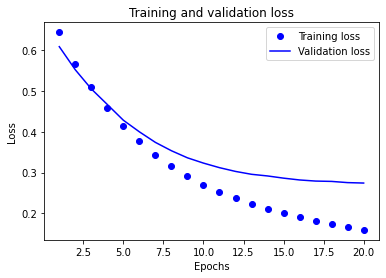

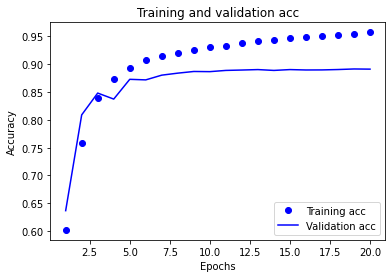

In [24]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Model 8 Evaluation**

model  | layers |hidden units |learn rate |minLoss |maxAcc
-------|--------|-------------|-----------|--------|--------
1      | 1      |8            |basic      |0.2761  |0.8904
2      |2       |32,16        |basic      |0.2898  |0.8871
3      |2       |16,16        |basic      |0.2830  |0.8900
4      |1       |8            |basic      |0.2731  |0.8926
5      |1       |4            |basic      |0.2737  |0.8916
6      |1       |4            |0.001      |0.2736  |0.8914
7      |1       |4            |0.0020     |0.2740  |0.8903
8      |1       |4            |0.0005     |0.2743  |0.8914

Max validation accuracy of 0.8914 was achieved on epoch 19. The minimum validation loss was achieved on epoch 20. This is a vast improvement as the loss is following a steady decline as shown in the graph, indicating that the model is overfitting less- The training loss and validation loss are beginning to follow the same pattern.

##**Model 9**

Model 9 will introduce a dropout layer as advised in the universal workflow.

In [25]:
#model 9
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005, momentum=0.0),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 66ms/step - loss: 0.6639 - accuracy: 0.5965 - val_loss: 0.6274 - val_accuracy: 0.7959
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6130 - accuracy: 0.6700 - val_loss: 0.5813 - val_accuracy: 0.8135
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5817 - accuracy: 0.7063 - val_loss: 0.5498 - val_accuracy: 0.8476
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5507 - accuracy: 0.7409 - val_loss: 0.5174 - val_accuracy: 0.8578
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5250 - accuracy: 0.7579 - val_loss: 0.4941 - val_accuracy: 0.8640
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5085 - accuracy: 0.7709 - val_loss: 0.4701 - val_accuracy: 0.8649
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4900 - accuracy: 0.7875 - val_loss: 0.4526 - val_accuracy: 0.8714
Epoch 8/20
30

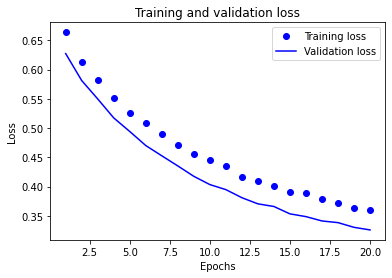

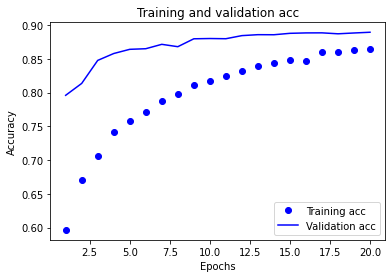

In [26]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Model 9 Evaluation**

model  | layers |hidden units |learn rate |dropout      |minLoss |maxAcc
-------|--------|-------------|-----------|-------------|--------|--------
1      | 1      |8            |basic      |no           |0.2761  |0.8904
2      |2       |32,16        |basic      |no           |0.2898  |0.8871
3      |2       |16,16        |basic      |no           |0.2830  |0.8900
4      |1       |8            |basic      |no           |0.2731  |0.8926
5      |1       |4            |basic      |no           |0.2737  |0.8916
6      |1       |4            |0.001      |no           |0.2736  |0.8914
7      |1       |4            |0.0020     |no           |0.2740  |0.8903
8      |1       |4            |0.0005     |no           |0.2743  |0.8914
9      |1       |4            |0.0005     |0.5          |0.3257  |0.8893

The addition of the dropout has produced outputs that show signs of underfitting. The max validation accuracy and minimum validation loss were achieved in epoch 20.

The underfitting caused by the dropout layer (0.5) is potentially a positive outcome as it means that there is a limit to the degradation of performance compared to overfitting, which has no limit to the degradation of the models outputs.

Although this result may have mixed opinions, it will be put into consideration for the conclusion.

##**Model 10**

This model will have a dropout layer of 0.25 instead of 0.5.

In [27]:
#model 10
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation = 'sigmoid'))

from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005, momentum=0.0),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 67ms/step - loss: 0.6458 - accuracy: 0.6418 - val_loss: 0.5975 - val_accuracy: 0.7432
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5665 - accuracy: 0.7545 - val_loss: 0.5385 - val_accuracy: 0.8317
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5172 - accuracy: 0.7915 - val_loss: 0.4953 - val_accuracy: 0.8501
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4769 - accuracy: 0.8171 - val_loss: 0.4595 - val_accuracy: 0.8635
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4435 - accuracy: 0.8345 - val_loss: 0.4309 - val_accuracy: 0.8688
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4219 - accuracy: 0.8479 - val_loss: 0.4100 - val_accuracy: 0.8743
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3984 - accuracy: 0.8600 - val_loss: 0.3921 - val_accuracy: 0.8732
Epoch 8/20
30

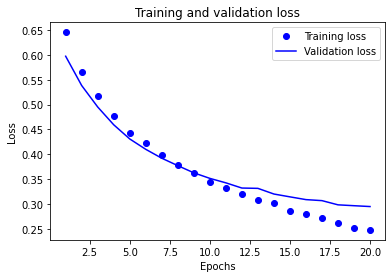

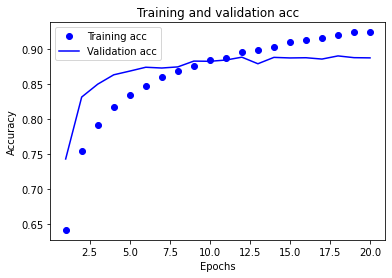

In [28]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Model 10 Evaluation**

model  | layers |hidden units |learn rate |dropout      |minLoss |maxAcc
-------|--------|-------------|-----------|-------------|--------|--------
1      | 1      |8            |basic      |no           |0.2761  |0.8904
2      |2       |32,16        |basic      |no           |0.2898  |0.8871
3      |2       |16,16        |basic      |no           |0.2830  |0.8900
4      |1       |8            |basic      |no           |0.2731  |0.8926
5      |1       |4            |basic      |no           |0.2737  |0.8916
6      |1       |4            |0.001      |no           |0.2736  |0.8914
7      |1       |4            |0.0020     |no           |0.2740  |0.8903
8      |1       |4            |0.0005     |no           |0.2743  |0.8914
9      |1 +drop |4            |0.0005     |0.5          |0.3257  |0.8893
10     |1 +drop |4            |0.0005     |0.25         |0.2948  |0.8905

The model above shows a good relationship with the training and validation ( training ~ validation). The minimum loss was 0.2948 after 20 epochs whereas the max validation accuracy was after 18 epochs.

##**Model 11**

Model 11 introduces 8 units rather than 4 to investigate the outcome of the model.

In [29]:
#Model 11.
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation = 'sigmoid'))

from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005, momentum=0.0),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.6165 - accuracy: 0.6655 - val_loss: 0.5504 - val_accuracy: 0.8008
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5088 - accuracy: 0.7873 - val_loss: 0.4812 - val_accuracy: 0.8524
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4500 - accuracy: 0.8247 - val_loss: 0.4316 - val_accuracy: 0.8645
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4111 - accuracy: 0.8440 - val_loss: 0.4002 - val_accuracy: 0.8724
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3765 - accuracy: 0.8651 - val_loss: 0.3788 - val_accuracy: 0.8714
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3528 - accuracy: 0.8757 - val_loss: 0.3672 - val_accuracy: 0.8691
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3321 - accuracy: 0.8843 - val_loss: 0.3432 - val_accuracy: 0.8845
Epoch 8/20
30

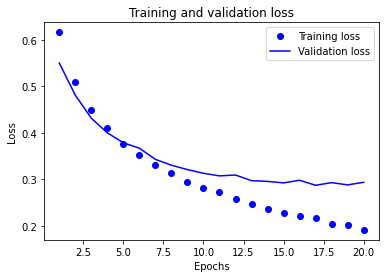

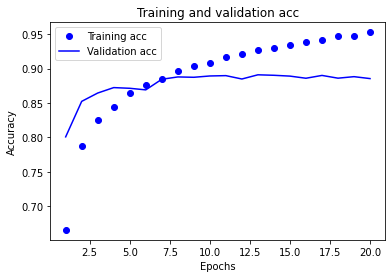

In [30]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Model 11 Evaluation**

model  | layers |hidden units |learn rate |dropout      |minLoss |maxAcc
-------|--------|-------------|-----------|-------------|--------|--------
1      |1       |8            |basic      |no           |0.2761  |0.8904
2      |2       |32,16        |basic      |no           |0.2898  |0.8871
3      |2       |16,16        |basic      |no           |0.2830  |0.8900
4      |1       |8            |basic      |no           |0.2731  |0.8926
5      |1       |4            |basic      |no           |0.2737  |0.8916
6      |1       |4            |0.001      |no           |0.2736  |0.8914
7      |1       |4            |0.0020     |no           |0.2740  |0.8903
8      |1       |4            |0.0005     |no           |0.2743  |0.8914
9      |1 +drop |4            |0.0005     |0.5          |0.3257  |0.8893
10     |1 +drop |4            |0.0005     |0.25         |0.2948  |0.8905
11     |1 +drop |8            |0.0005     |0.25         |0.2875  |0.8901

In this model, both minimum validation loss and maximum validation accuracy were achieved after 17 epochs. This model has the least degradation while keeping a close relationship between the training loss and the Validation loss.
The max accuracy is also not sacrificed and is kept at 89%.

##**Final Model**
The final model will be considered based on the table and the trends in the graphs seen above in the report.

The final model will be based on:
1. model 1 = 8 units
1. model 8 = learning rate set at 0.0005
1.model 10 = dropout set at 0.25

In [33]:
#FINAL.
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation = 'sigmoid'))

from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005, momentum=0.0),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.6093 - accuracy: 0.7063 - val_loss: 0.5332 - val_accuracy: 0.8323
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4951 - accuracy: 0.8145 - val_loss: 0.4579 - val_accuracy: 0.8543
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4302 - accuracy: 0.8479 - val_loss: 0.4103 - val_accuracy: 0.8680
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3847 - accuracy: 0.8661 - val_loss: 0.3765 - val_accuracy: 0.8772
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3477 - accuracy: 0.8820 - val_loss: 0.3506 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3236 - accuracy: 0.8919 - val_loss: 0.3330 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3009 - accuracy: 0.8996 - val_loss: 0.3194 - val_accuracy: 0.8864
Epoch 8/20
30

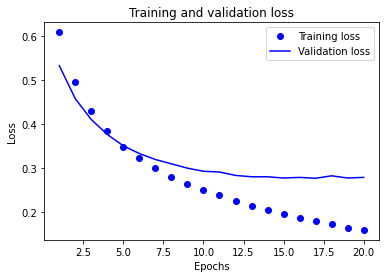

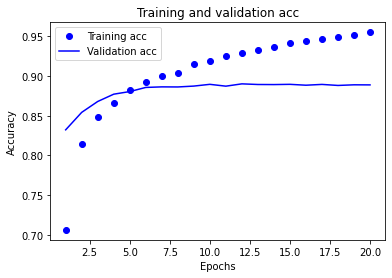

In [35]:
#graph
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']
lossGraph(loss,val_loss)

history_dict['accuracy']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
accGraph(acc,val_acc)

##**Final Evaluation**
model  |minLoss |maxAcc
-------|--------|--------
final  |0.2768  |0.8902

The final results show that there is no degradation in the performance of the final model. The final model has achieved an 89% accuracy for predicting the data.

##**Conclusion**
Considering the hypothesis that was predicted at the beginning of the report, the provided input samples are sufficient enough to provide a valid and accurate output from our final model (accuracy rate of 89%). Also, the information given to us from the dataset was adequate to complete the tests. However, strong underfitting was experienced on model 9 which could indicate that more data is needed for testing and validation to yield better results. 

I believe that the learning rate and dropout were most effective at maintaining valid and accurate results similar to the training outputs. Although units made impactful changes, I believe that tuning the units to a lower value was the simplest solution to improving the model (anything above 8 was harming output).

As with any statistical review, having more data to test with is always a consideration as it provides us with a more accurate result.

###**References**
Blackwell, T., 2021, AI Module videos and lecture notes, Goldsmiths
CHOLLET, F., 2018, DEEP LEARNING WITH PYTHON, Manning Publications


